# Assignment 2. Statistical Tests

## Introduction

In this homework, we ask you to write python code to answer questions regarding some datasets. We will learn how to restructure the dataset for our analysis, applying statistal tests on the data, and drawing conclusions from our analysis. 

### Data

For this homework, we will use these datasets.
1. Auto-MPG: https://www.kaggle.com/uciml/autompg-dataset/data
2. NOAA Hanover Climate Data: https://www.ncdc.noaa.gov/cdo-web/
3. COVID-19 Data in the United States: https://github.com/nytimes/covid-19-data

### References

Chapter 5, 6, and 7 in Data Science from Scatch.
Select statistical tests:
- https://stats.idre.ucla.edu/other/mult-pkg/whatstat/
- https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740

# Problem 1 MPG of Vehicles from Different Origin

The attached MPG dataset ([auto-mpg.csv](https://drive.google.com/file/d/1l_Z3KKAvGt5iz2mcsAfyqJaBRudqjqdq/view?usp=sharing)) contains the MPG of vehicles made by American, European, and Japaness car  makers. We use the data set to answer the following questions.

The column names of the dataset are: 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'.

For the 'origin' column: **1-America, 2-Europe. 3-Japan**

## Q1 Load the dataset to a pandas dataframe.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api
import scipy.stats as stats
import pylab
%matplotlib inline

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
drive.CreateFile({'id': '1l_Z3KKAvGt5iz2mcsAfyqJaBRudqjqdq'}).GetContentFile('auto-mpg.csv')

In [ ]:
headers = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
mpg_data = pd.read_csv('auto-mpg.csv', usecols=headers)

In [ ]:
mpg_data.sample(frac=1).head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
228,18.5,6,250.0,98,3525,19.0,77,1,ford granada
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
347,37.0,4,85.0,65,1975,19.4,81,3,datsun 210 mpg
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
98,16.0,6,250.0,100,3278,18.0,73,1,chevrolet nova custom


## Q2 Plot the histograms of cars from different origins. (5 pts)

A histogram looks like [this](https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/).

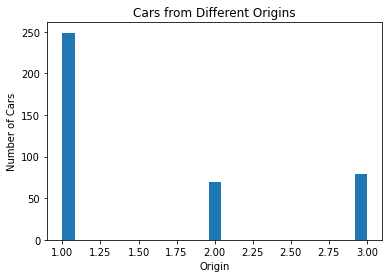

In [ ]:
#use mpg_data from Q1 to make a histogram. Tweaked bin
plt.hist(mpg_data.origin, bins=25)
plt.title('Cars from Different Origins')
plt.xlabel('Origin')
plt.ylabel('Number of Cars')
plt.show()

## Q3 Plot the boxplots to inspect the distributions of vehicles' MPG. (5 pts)

In this question, we look at the MPG distribution in different groups. Make three boxplots to inspect the distribution:
1. MPG from different origins
2. MPG of different number of cylinders
3. MPG of different model years

A boxplot looks like [this](https://matplotlib.org/examples/pylab_examples/boxplot_demo.html):

<img src="https://matplotlib.org/_images/boxplot_demo_06.png" align="left" style="width: 400px;"/>

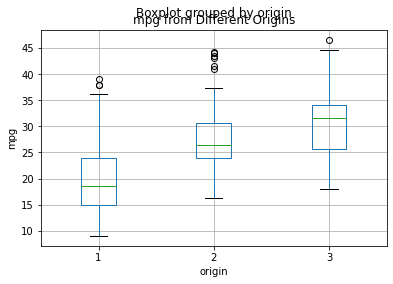

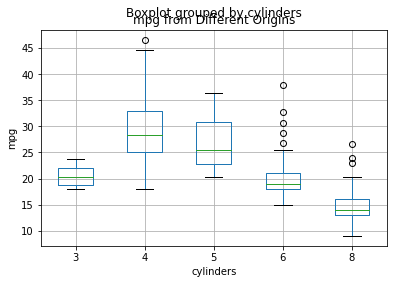

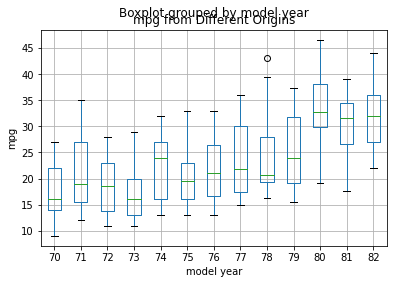

In [ ]:
# Import data 
data = mpg_data

#Generate 3 boxplots with custom name and y-label 

data.boxplot(column='mpg', by='origin')
plt.title('mpg from Different Origins')
plt.ylabel('mpg')

data.boxplot(column='mpg', by='cylinders')
plt.title('mpg from Different Origins')
plt.ylabel('mpg')

data.boxplot(column='mpg', by='model year')
plt.title('mpg from Different Origins')
plt.ylabel('mpg')
plt.show()


## Q4 Inspect the distribution. (10 pts)

Now we use [Q–Q (quantile-quantile) plot](https://en.wikipedia.org/wiki/Q–Q_plot) to compare the MPG data to a normal distribution.

Use [statsmodels.graphics.gofplots.qqplot](http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html) to make the following 4 plots:
1. All MPG
2. MPG of American cars
3. MPG of European cars
4. MPG of Janpanese cars

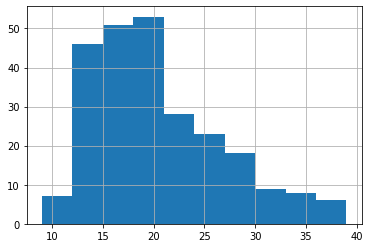

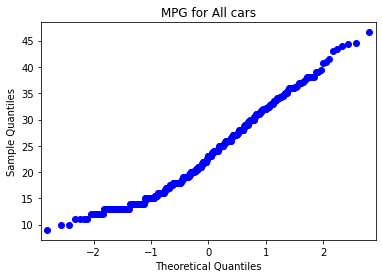

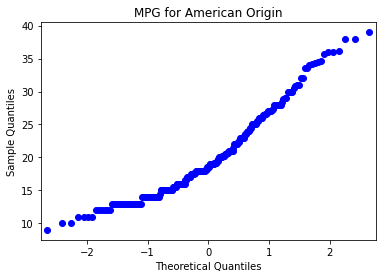

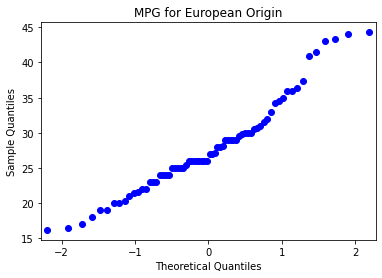

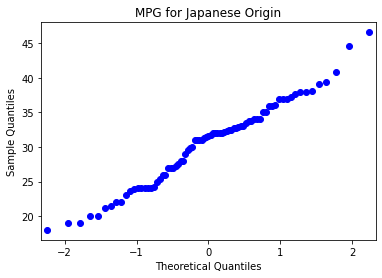

In [ ]:
# Pull data out based on Origin number
origin1 = (mpg_data[mpg_data.origin == 1])
origin2 = (mpg_data[mpg_data.origin == 2])
origin3 = (mpg_data[mpg_data.origin == 3])

#use Origin_.mpg to get mpg data of specific origin, then plot the graph
origin1.mpg.hist()
plt.show()

# plot data of all cars by using mpg_data
statsmodels.graphics.gofplots.qqplot(mpg_data.mpg)
plt.title("MPG for All cars")

statsmodels.graphics.gofplots.qqplot(origin1.mpg)
plt.title("MPG for American Origin")
plt.show()

statsmodels.graphics.gofplots.qqplot(origin2.mpg)
plt.title("MPG for European Origin")
plt.show()

statsmodels.graphics.gofplots.qqplot(origin3.mpg)
plt.title("MPG for Japanese Origin")
plt.show()


## Q5 Compute and visualize confidence intervals. (10 pts)

Confidence interval is a range of values that there is a probability (e.g., 95%) that the true value lies within the range. Check [here](https://online.stat.psu.edu/stat500/lesson/5) for more information.

Compute the 95% confidence intervals for:
1. American cars (origin=1)
2. European cars (origin=2)
3. Japanese cars (origin=3)

Print out the intervals, e.g., "95% CI for US cars: 18-21"

Make plot to compare the three confidence intervals. You may make different types of plots to show the CIs. One example:

<img src="https://i.stack.imgur.com/YW6Me.png" align="left" style="width: 400px;"/>


95% CI for US cars
19.28823121951037 20.878837053581986
95% CI for European cars
27.056249586085354 28.726607556771793
95% CI for Japanese cars
29.694188326256416 31.207077496528377


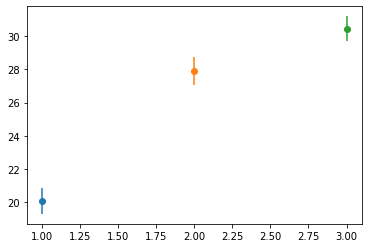

In [ ]:
#Imports 
import numpy as np
import scipy 
import math
data = mpg_data

# Setting variables 
origin1 = (mpg_data[mpg_data.origin == 1])
origin2 = (mpg_data[mpg_data.origin == 2])
origin3 = (mpg_data[mpg_data.origin == 3])
x1 = origin1.mpg.mean()
x2 = origin2.mpg.mean()
x3 = origin3.mpg.mean()
SD1 = origin1.mpg.std()
SD2 = origin2.mpg.std()
SD3 = origin3.mpg.std()
n1 = math.sqrt(origin1.shape[0])
n2 = math.sqrt(origin1.shape[0])
n3 = math.sqrt(origin1.shape[0])

# Generating and printing confidence interval for American Cars 
CI1low = x1 - 1.96*(SD1/n1)
CI1high = x1 + 1.96*(SD1/n1)
print("95% CI for US cars") 
print(CI1low, CI1high)


# Generating and printing confidence interval for European Cars 
CI2low = x2 - 1.96*(SD2/n2)
CI2high = x2 + 1.96*(SD2/n2)
print("95% CI for European cars") 
print(CI2low, CI2high)

# Generating and printing confidence interval for Japanese Cars 
CI3low = x3 - 1.96*(SD3/n3)
CI3high = x3 + 1.96*(SD3/n3)
print("95% CI for Japanese cars") 
print(CI3low, CI3high)

# Displaying plot of error bars 
plt.errorbar(1, x1, yerr=1.96*(SD1/n1), fmt='o')
plt.errorbar(2, x2, yerr=1.96*(SD2/n2), fmt='o')
plt.errorbar(3, x3, yerr=1.96*(SD3/n3), fmt='o')
plt.show()






## Q6 Are MPGs significantly different between origin groups? (20 pts)

In this question, we will use two methods to determine if the mean MPGs of cars from different origin are significantly different. 

**Method 1 - one-way ANOVA**
Use [statsmodels.stats.anova.anova_lm](http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html) to do ANOVA. Print out the ANOVA table. **Explain the results**.

**Method 2 - Kruskal–Wallis one-way analysis of variance**
Kruskal–Wallis is a the non-parametric method to test whether or not the samples are drawn from the same distribution. Use [scipy.stats.kruskal](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.kruskal.html) to do the analysis, print out the statistics, and **explain the results**.


In [ ]:
# Method 1 - Generating Anova Table 
from statsmodels.formula.api import ols
lm = ols('mpg ~ C(origin)',data=mpg_data).fit()
anova_table = statsmodels.api.stats.anova_lm(lm)
print(anova_table)

#For origin data we see significant correlation as 
# Method 2 - Generating Kruskal-Wallis one-way analysis of variance 
kruskal_wallis_table = stats.kruskal(mpg_data.query('origin==1')['mpg'], mpg_data.query('origin==2')['mpg'], mpg_data.query('origin==3')['mpg'])
print(kruskal_wallis_table) 

              df        sum_sq      mean_sq          F        PR(>F)
C(origin)    2.0   8072.820662  4036.410331  98.541795  1.915486e-35
Residual   395.0  16179.754815    40.961405        NaN           NaN
KruskalResult(statistic=134.45665866995384, pvalue=6.354882752621894e-30)


Method 1 - The F-stat on this ANOVA test is much larger than the critical value at an alpha level of 0.05. Thus, we can reject the null hypothesis and have found a statistically significant relationship that the mean MPG's of cars from different origins aare significantly different. However, from the plots in Q4 we know the data is non-parametric, while ANOVA tests are the parametric method. In this case, the Kruskal method is preferrable. 

Method 2 - The t-score on this Kruskal-Wallis ANOVA is much smaller than the statistically significant score at alpha level of 0.05. Thus, we can also reject the null hypothesis using this method and found a statistically significant difference between the mean MPG's of cars from different origins. 



From Method 1 the F-stat is much larger than the critical value at an alpha level = 0.05. Thus, have found a statistically significant relationship and can reject the null hypothesis. Note that the ANOVA assumes parametric data, which we know from Q4 is not the case here. The Kruskal test is thus a more accurate model as it is a non-parametric method. 

From Method 2 the t-score is much less than the significance level for 0.05, thus we have found a statistically significant relationship and can reject the null hypothesis. As the Kruskal test is the non-parametric method, the data is more fit to this model to determine statistical correlations.  

## Q7 Compare the means of two groups. (20 pts)

In this question, we will use three methods to determine if the mean MPGs of American cars and Japanese cars are different.

**Method 1 - Pooled variance 2-sample t-test**

**Method 2 - Non-pooled variance 2-sample t-test**

**Method 3 - Mann–Whitney U test**

Explain the results and the conclusion you draw from the results. 

In [ ]:
# Setting data  
American_data = mpg_data.query('origin==1')['mpg'] Japanese_data = mpg_data.query('origin==3')['mpg']

# Printing pooled and non-pooled tests 
pooled_test = stats.ttest_ind(American_data, Japanese_data, equal_var = True)
non_pooled_test = stats.ttest_ind(American_data, Japanese_data, equal_var = False)
print(pooled_test)
print()
print(non_pooled_test)
print()

# Generating Mann-Whitney U test 
mann_whitney_test = stats.mannwhitneyu(American_data, Japanese_data) print(mann_whitney_test)

Ttest_indResult(statistic=-12.684336451971392, pvalue=3.0598199771888896e-30)

Ttest_indResult(statistic=-13.018778440054831, pvalue=1.0109535398281843e-25)

MannwhitneyuResult(statistic=2499.5, pvalue=8.171225467272223e-24)


### Explain your results here:

In terms of the data , the pooled variance dataset considers all data, non-pooled considers each origin for each sub-sample is calculated independently, and Mann-Whitney compares 2 samples in the same population and is a non-parametric method. This first difference explains why the two t-tests have a p-value difference by a magnitude of 1.0x10^5. 

Another difference to note is t-tests hold the assumption that the data is drawn from a normal distribution. Based on the quintile-quintile plot of Q4, we know the data does not exemplify a normal distribution. Conversly, the Mann-Whitney test is preferrable as this assumption is not relied on and the method is non-parametric. We prefer Mann-Whitney as the data is not perfectly distributed. 

## Q8 Interactions of two variables - part 1 (10 pts)

Now we look at how two variables affect MPG. We are interested in origin and displacement. We first bucket displacement with interval of 50 and put the bucket number in a new column called displacement_bucket. The buckets could be, for example:

0. 0-50
1. 50-100
2. 100-150
3. ...

Then, make an [interaction plot](http://www.statsmodels.org/dev/generated/statsmodels.graphics.factorplots.interaction_plot.html) of displacement_bucket and origin vs MPG.

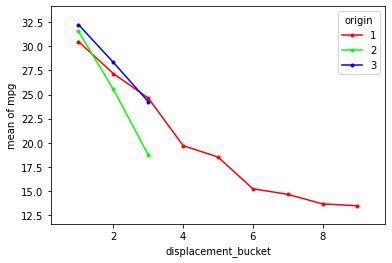

0    6
1    7
2    6
3    6
4    6
5    8
6    9
7    8
8    9
9    7
Name: displacement_bucket, dtype: int64

In [ ]:
# Set data 
db = (mpg_data['displacement']/50).astype(int) 
mpg_data['displacement_bucket'] = db

# Generate and display an interaction plot of data
fig = statsmodels.graphics.factorplots.interaction_plot(mpg_data['displacement_bucket'], mpg_data['origin'], mpg_data['mpg'])
plt.show()
display(mpg_data['displacement_bucket'].head(n = 10))

## Q8 Interactions of two variables - part 2 (15 pts)

Now we use statistical test to quantitatively inspect the interactions. Use two-way ANOVA to determine if there are any interactions between origin and displacement_bucket. Print out the two-way ANOVA table and **explain the results**. What conclusion can you draw from your analysis? Does your result invalidate the conclusion drawn from previous one-way ANOVA and t-test? Why?

Hint 1: you might encounter errors when running two-way ANOVA. You might need to select a subset of the data to do the analysis. Explain your method. 

Hint 2: Approach the last question from how two-way ANOVA is interpreted and from the perspective of Design of Experiments.

In [ ]:
# Import functions
from statsmodels.formula.api import ols

# Set ANOVA model 
model = ols('mpg ~ C(origin)*C(displacement_bucket)', data=mpg_data).fit()
res = statsmodels.api.stats.anova_lm(model, typ=2)
print(res)


                                       sum_sq     df       F    PR(>F)
C(origin)                                 NaN    2.0     NaN       NaN
C(displacement_bucket)                    NaN    8.0     NaN       NaN
C(origin):C(displacement_bucket)   597.174218   16.0  1.9351  0.103898
Residual                          7387.142840  383.0     NaN       NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1768: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


### Explain your results here:


Based on this data there are a few conclusions we can draw. We can draw that the MPG is dependant, the origin and displacement are independent, and the origin and displacement are both non-significant in the co-interaction.  

# Problem 2 Is Hanover getting hotter or colder over the years? (20 pts)

Now we use the Hanover climate data from Assignment 1 to answer if Hanover is getting hotter or colder over the past years (global warming?). This is an open question. It is totally up to you choosing statistical tests. You must:

#### 1. Visualize the data. (5 pts)
#### 2. Choose your test and run it. (10 pts)
#### 3. Explain results. (5 pts)

In [ ]:
drive.CreateFile({'id': '1JX7HLX8B8qgEJ4q19qEg6VuMeQe4OS8H'}).GetContentFile('NOAA_Hanover.csv')

In [ ]:
hanover_data = pd.read_csv('NOAA_Hanover.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,29,31,33,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#TMAX - TMIN for temp for each year
tmaxminDif = hanover_data["TMAX"] - hanover_data["TMIN"]

#apply test 
from statsmodels.formula.api import ols
lm = ols('mpg ~ C(origin)',data=mpg_data).fit()
anova_table = statsmodels.api.stats.anova_lm(lm)
print(anova_table)





              df        sum_sq      mean_sq          F        PR(>F)
C(origin)    2.0   8072.820662  4036.410331  98.541795  1.915486e-35
Residual   395.0  16179.754815    40.961405        NaN           NaN


Based on the data and slope, we know that the temperature is getting colder over the years. 